In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import plotly.express as px
import plotly.graph_objects as go

# Data Import, Cleansing and Description

In [5]:
data = pd.read_csv("apple_products.csv")

In [7]:
data

,Product Name,Product URL,Brand,Sale Price,Mrp,Discount Percentage,Number Of Ratings,Number Of Reviews,Upc,Star Rating,Ram
0,"APPLE iPhone 8 Plus (Gold, 64 GB)",https://www.flipkart.com/apple-iphone-8-plus-g...,Apple,49900,49900,0,3431,356,MOBEXRGV7EHHTGUH,4.6,2 GB
1,"APPLE iPhone 8 Plus (Space Grey, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVAC6TJT4F,4.6,2 GB
2,"APPLE iPhone 8 Plus (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-plus-s...,Apple,84900,84900,0,3431,356,MOBEXRGVGETABXWZ,4.6,2 GB
3,"APPLE iPhone 8 (Silver, 256 GB)",https://www.flipkart.com/apple-iphone-8-silver...,Apple,77000,77000,0,11202,794,MOBEXRGVMZWUHCBA,4.5,2 GB
4,"APPLE iPhone 8 (Gold, 256 GB)",https://www.flipkart.com/apple-iphone-8-gold-2...,Apple,77000,77000,0,11202,794,MOBEXRGVPK7PFEJZ,4.5,2 GB
...,...,...,...,...,...,...,...,...,...,...,...
57,"APPLE iPhone SE (Black, 64 GB)",https://www.flipkart.com/apple-iphone-se-black...,Apple,29999,39900,24,95909,8161,MOBFWQ6BR3MK7AUG,4.5,4 GB
58,"APPLE iPhone 11 (Purple, 64 GB)",https://www.flipkart.com/apple-iphone-11-purpl...,Apple,46999,54900,14,43470,3331,MOBFWQ6BTFFJKGKE,4.6,4 GB
59,"APPLE iPhone 11 (White, 64 GB)",https://www.flipkart.com/apple-iphone-11-white...,Apple,46999,54900,14,43470,3331,MOBFWQ6BVWVEH3XE,4.6,4 GB
60,"APPLE iPhone 11 (Black, 64 GB)",https://www.flipkart.com/apple-iphone-11-black...,Apple,46999,54900,14,43470,3331,MOBFWQ6BXGJCEYNY,4.6,4 GB


In [137]:
print(data.isnull().sum())

Product Name           0
Product URL            0
Brand                  0
Sale Price             0
Mrp                    0
Discount Percentage    0
Number Of Ratings      0
Number Of Reviews      0
Upc                    0
Star Rating            0
Ram                    0
dtype: int64


### Hence, No null value is present in data. This means data is clean.Now we will check the description of data.

In [21]:
print(data.describe())

          Sale Price            Mrp  Discount Percentage  Number Of Ratings  \
count      62.000000      62.000000            62.000000          62.000000   
mean    80073.887097   88058.064516             9.951613       22420.403226   
std     34310.446132   34728.825597             7.608079       33768.589550   
min     29999.000000   39900.000000             0.000000         542.000000   
25%     49900.000000   54900.000000             6.000000         740.000000   
50%     75900.000000   79900.000000            10.000000        2101.000000   
75%    117100.000000  120950.000000            14.000000       43470.000000   
max    140900.000000  149900.000000            29.000000       95909.000000   

       Number Of Reviews  Star Rating  
count          62.000000    62.000000  
mean         1861.677419     4.575806  
std          2855.883830     0.059190  
min            42.000000     4.500000  
25%            64.000000     4.500000  
50%           180.000000     4.600000  
75%     

# IPHONE SALES ANALYSIS IN INDIA

### Now we will see top iphones using star rating analysis

In [55]:
highest_rated = data.sort_values(by = ["Star Rating"], ascending = False )

In [57]:
highest_rated = highest_rated.head(10)

In [61]:
highest_rated["Product Name"]

20     APPLE iPhone 11 Pro Max (Midnight Green, 64 GB)
17         APPLE iPhone 11 Pro Max (Space Grey, 64 GB)
16    APPLE iPhone 11 Pro Max (Midnight Green, 256 GB)
15               APPLE iPhone 11 Pro Max (Gold, 64 GB)
14              APPLE iPhone 11 Pro Max (Gold, 256 GB)
0                    APPLE iPhone 8 Plus (Gold, 64 GB)
29                     APPLE iPhone 12 (White, 128 GB)
32          APPLE iPhone 12 Pro Max (Graphite, 128 GB)
35                     APPLE iPhone 12 (Black, 128 GB)
36                      APPLE iPhone 12 (Blue, 128 GB)
Name: Product Name, dtype: object

### Highest Rated IPhone on Flipkart with its number of ratings

In [102]:
iphones = highest_rated["Product Name"].value_counts()
labels = iphones.index
counts = highest_rated["Number Of Ratings"]

In [104]:
figure = px.bar(highest_rated, x=labels, y=counts, title = "Highest Rated IPhones in India", height = 750)

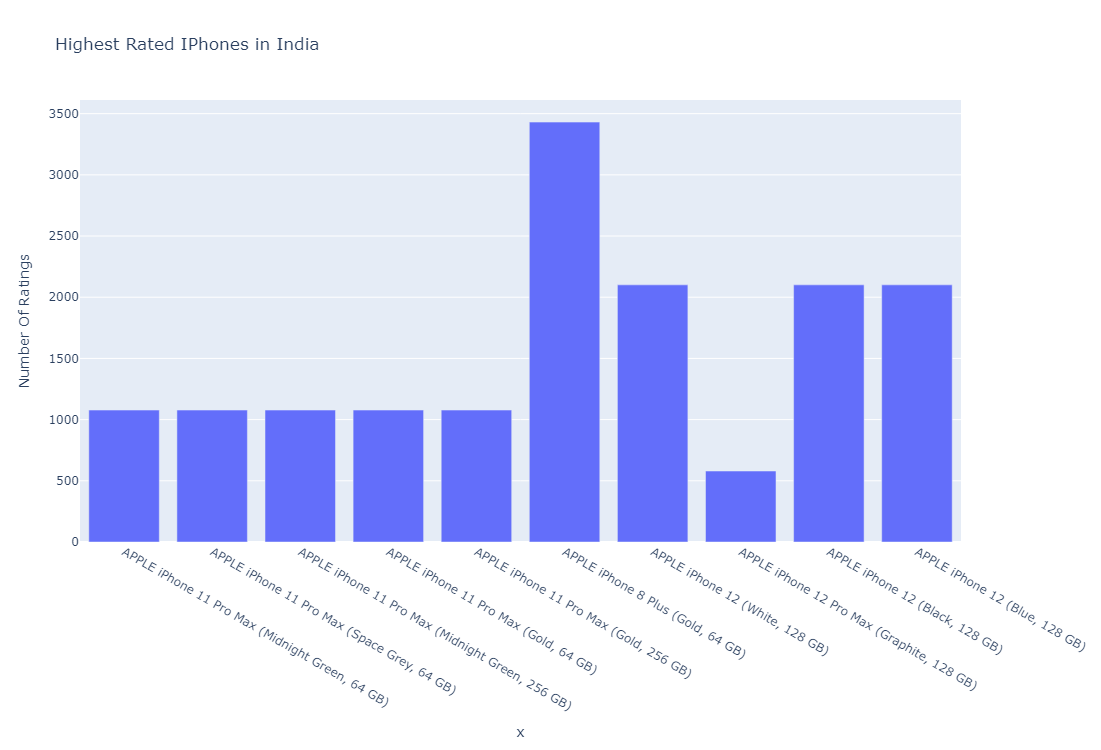

In [106]:
figure.show()

### Now we will Number of reviews of highest rated iphones

In [110]:
iphones = highest_rated["Product Name"].value_counts()
labels1 = iphones.index
counts1 = highest_rated["Number Of Reviews"]

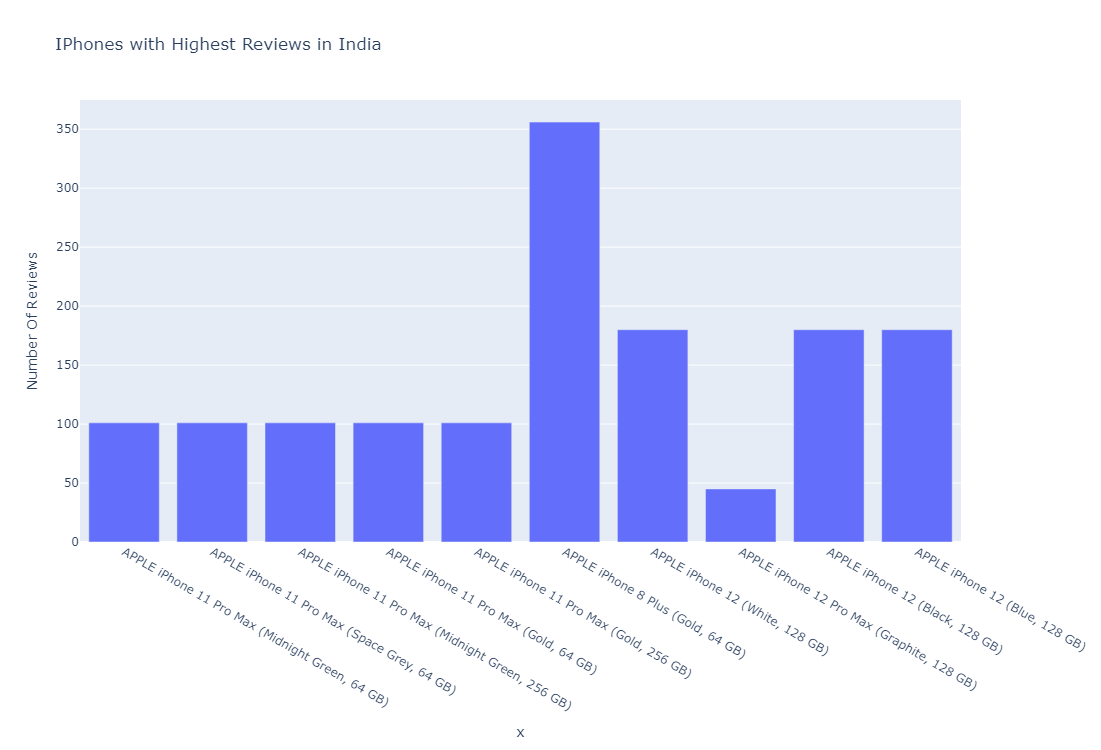

In [112]:
figure1 = px.bar(highest_rated, x=labels1, y=counts1, title = "IPhones with Highest Reviews in India", height = 750)
figure1.show()

### Now we will plot scatter graph with number of ratings and price of iphones

In [131]:
figure2 = px.scatter(data_frame = data, x = "Number Of Ratings", y = "Sale Price", size = "Discount Percentage", trendline = 'ols', title = "Relation b/w Sales Price and Number of Ratings", height = 750)

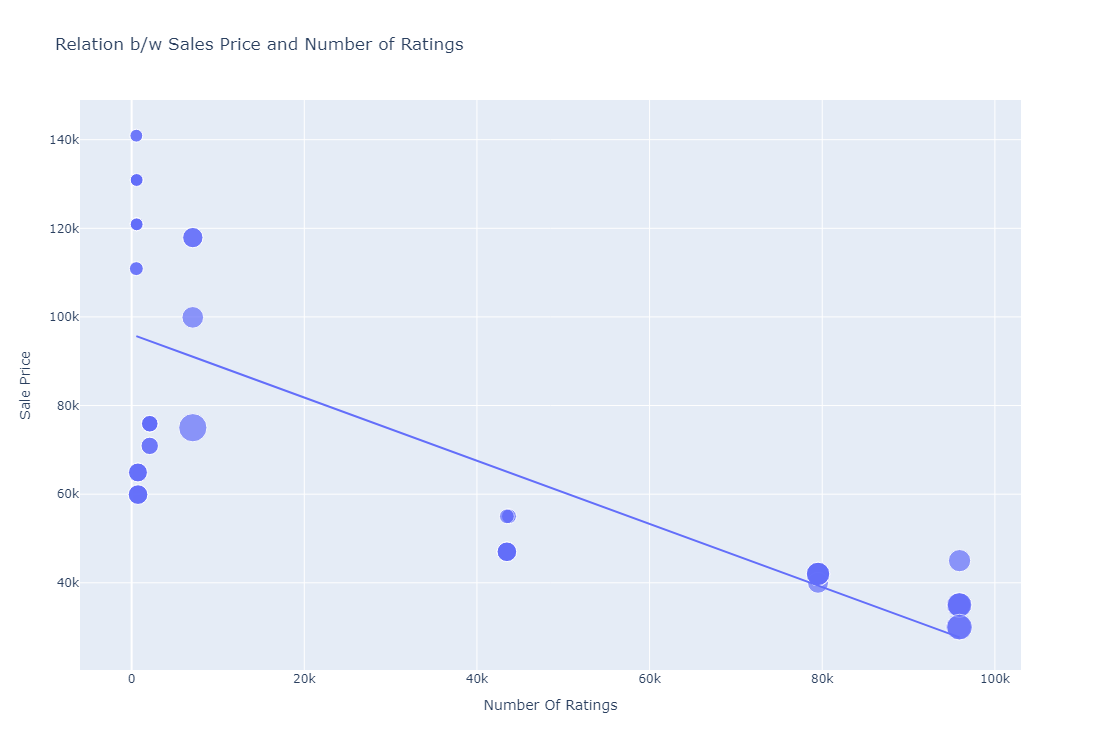

In [133]:
figure2.show()

In [127]:
figure3 = px.scatter(data_frame = data, x = "Number Of Ratings", y = "Discount Percentage", size = "Sale Price", trendline = 'ols', title = "Relation b/w Sales Price and Number of Ratings", height = 750)

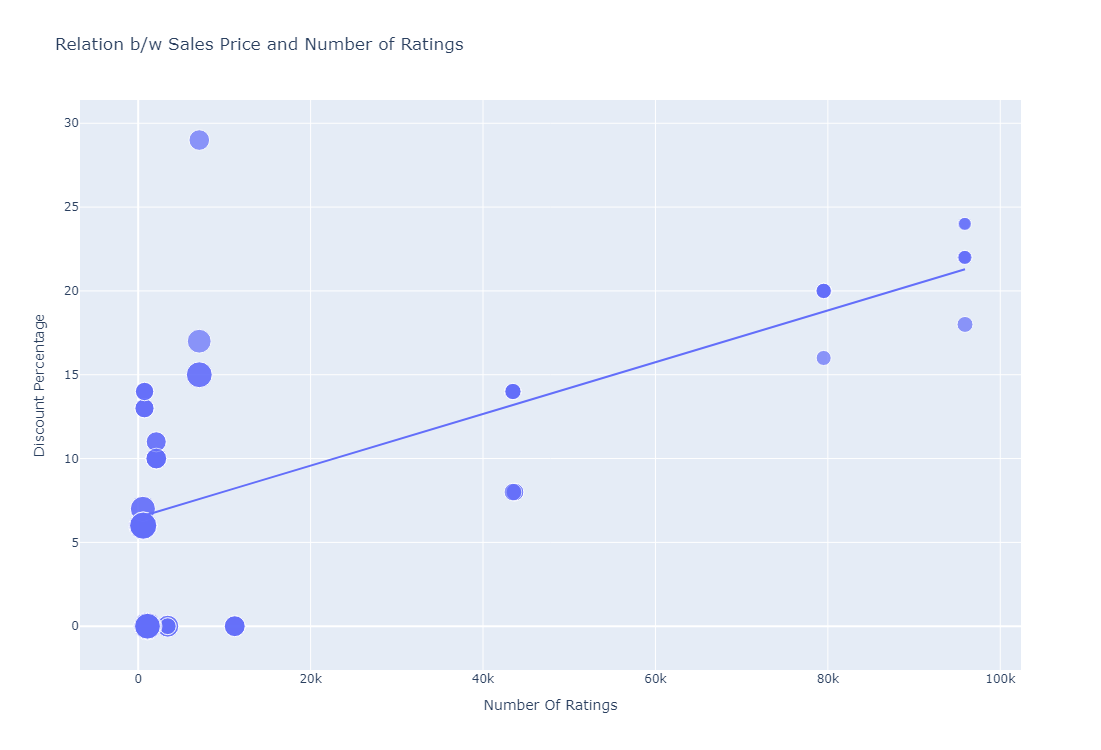

In [129]:
figure3.show()